In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv('../data/result/joined_result.csv')
df['date'] = pd.to_datetime(df['date'])

In [3]:
df.columns

Index(['date', 'Y', 'S_id', 'S_lon', 'S_lat', 'S_elevation', 'T_intensidad',
       'T_ocupacion', 'T_carga', 'T_vmed', 'M_T', 'M_Po', 'M_P', 'M_Pa', 'M_U',
       'M_DD', 'M_Ff', 'M_ff10', 'M_ff3', 'M_N', 'M_WW', 'M_W1', 'M_W2',
       'M_Tn', 'M_Tx', 'M_Cl', 'M_Nh', 'M_H', 'M_Cm', 'M_Ch', 'M_VV', 'M_Td',
       'M_RRR', 'M_tR', 'M_E', 'M_Tg', 'M_E'', 'M_sss', 'M_station_name',
       'M_lat', 'M_lon'],
      dtype='object')

In [4]:
df

,date,Y,S_id,S_lon,S_lat,S_elevation,T_intensidad,T_ocupacion,T_carga,T_vmed,...,M_Td,M_RRR,M_tR,M_E,M_Tg,M_E',M_sss,M_station_name,M_lat,M_lon
0,2018-01-01 01:00:00,1.0,28079024,-3.747347,40.419356,642,987.488095,4.363095,30.392857,0.0,...,-3.6,No precipitation,3.0,NaN,NaN,NaN,NaN,Local time in Madrid / University City,40.448726,-3.733891
1,2018-01-01 02:00:00,6.0,28079024,-3.747347,40.419356,642,952.214286,4.636905,32.547619,0.0,...,-3.6,No precipitation,1.0,NaN,NaN,NaN,NaN,Local time in Madrid / University City,40.448726,-3.733891
2,2018-01-01 03:00:00,8.0,28079024,-3.747347,40.419356,642,534.511905,2.226190,18.511905,0.0,...,-3.3,No precipitation,1.0,NaN,NaN,NaN,NaN,Local time in Madrid / University City,40.448726,-3.733891
3,2018-01-01 05:00:00,5.0,28079024,-3.747347,40.419356,642,301.875000,0.916667,9.166667,0.0,...,-4.8,No precipitation,1.0,NaN,NaN,NaN,NaN,Local time in Madrid / University City,40.448726,-3.733891
4,2018-01-01 06:00:00,2.0,28079024,-3.747347,40.419356,642,334.291667,0.875000,9.458333,0.0,...,-4.8,No precipitation,1.0,NaN,NaN,NaN,NaN,Local time in Madrid / University City,40.448726,-3.733891
5,2018-01-01 07:00:00,4.0,28079024,-3.747347,40.419356,642,295.761905,0.833333,8.970238,0.0,...,-3.6,No precipitation,3.0,NaN,NaN,NaN,NaN,Local time in Madrid / University City,40.448726,-3.733891
6,2018-01-01 08:00:00,12.0,28079024,-3.747347,40.419356,642,181.982143,0.315476,5.797619,0.0,...,-3.9,No precipitation,1.0,NaN,NaN,NaN,NaN,Local time in Madrid / University City,40.448726,-3.733891
7,2018-01-01 09:00:00,14.0,28079024,-3.747347,40.419356,642,157.458333,0.708333,4.666667,0.0,...,-3.0,No precipitation,1.0,NaN,NaN,NaN,NaN,Local time in Madrid / University City,40.448726,-3.733891
8,2018-01-01 11:00:00,4.0,28079024,-3.747347,40.419356,642,255.327381,0.702381,6.904762,0.0,...,0.4,No precipitation,1.0,NaN,NaN,NaN,NaN,Local time in Madrid / University City,40.448726,-3.733891
9,2018-01-01 12:00:00,3.0,28079024,-3.747347,40.419356,642,363.208333,1.125000,9.750000,0.0,...,-2.7,No precipitation,1.0,NaN,NaN,NaN,NaN,Local time in Madrid / University City,40.448726,-3.733891


# Pre-processing

 Drop columns with all NaNs or 1 unique value, drop categorical data

In [5]:
df = df[df.columns[df.nunique()>1]]

### Wind: 
    -direccion M_DD(cat),	
    -v_media M_Ff,	-> numerical columns, no missing values
    -v_maxima en 10 mins anteriores M_ff10, -> Fill missing values with 0
    -maxima en periodo anterior	M_ff3 -> Fill missing values with 0
    
Supossing that missing data in maximum wind gust columns corresponds to no wind, we set theses values to 0

In [6]:
df.fillna({'M_ff10':0,'M_ff3':0}, inplace = True)

D:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### Categorical weather from station: 
    -M_WW -> If no data, set to 0 (it will be treated as a new category). It seems that only data is present if there is rain, so 0 can be interpreted as no-rain
    -M_W1	-> drop, very sparse data (TO BE REVIEWED)
    -M_W2   -> drop, very sparse data (TO BE REVIEWED)

In [7]:
df.loc[df['M_WW']==' ', 'M_WW'] = 0
df.drop(columns= ['M_W1', 'M_W2'], inplace= True)

D:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Tn, Tx, min y max temp en las 12 horas previas
Drop them

In [8]:
df.drop(columns= ['M_Tn', 'M_Tx'], inplace= True)

### Precipitations
M_RRR, set no precipitation to 0 

In [9]:
df.loc[df['M_RRR']=='No precipitation', 'M_RRR'] = 0

## Categorical columns encodings

In [10]:
cat_columns = ['M_DD', 'M_WW']

In [11]:
for col in cat_columns:
    df = pd.concat([df,pd.get_dummies(df[col], prefix=col)],axis=1).drop([col],axis=1)

# Images

In [12]:
images_loaded = np.load('../data/sentinel/images.npy')
times_loaded = np.load('../data/sentinel/times.npy')

In [13]:
# This should be done with training and then applied to test
images_loaded = images_loaded - images_loaded[~np.isnan(images_loaded)].mean()
images_loaded = images_loaded / images_loaded[~np.isnan(images_loaded)].std()
images_loaded = np.nan_to_num(images_loaded)
images_loaded = np.expand_dims(images_loaded, axis=-1) # Add singular dimension (for future multichannel images)

In [14]:
times_loaded = [pd.to_datetime(date) for date in times_loaded]

In [15]:
images_dict = dict(zip(times_loaded,images_loaded)) # Removes duplicated keys

In [16]:
len(images_dict)

333

In [17]:
to_delete = []
for key in images_dict.keys():
    if not(df['date'].isin([key]).any()):
        to_delete.append(key)     

In [18]:
len(to_delete)

37

In [19]:
for key in to_delete:
        del images_dict[key]

In [20]:
len(images_dict)

296

 # New model idea:
For each image, get the 24 previous values of the original dataframe

In [21]:
cols_scale = list(set(df.columns.values)- set(['date']))

In [22]:
cs = StandardScaler()
df[cols_scale] = cs.fit_transform(df[cols_scale])

D:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [23]:
timesteps = 25

In [24]:
Y = np.zeros(len(images_dict))
X = np.zeros((len(images_dict), timesteps, len(df.columns)-2 ))
X_images = np.zeros((len(images_dict), 10, 10, 1))
final_dates = []

In [25]:
for i, date in enumerate(sorted(images_dict.keys())):
    final_dates.append(date)
    df_temp = df[df['date'].between(date-pd.Timedelta('24h'), date)] \
    .set_index('date').resample('h').last().reset_index(drop=True).fillna(method='ffill').fillna(method='bfill')
    if len(df_temp)==timesteps:
        X[i] = df_temp.drop(columns = 'Y').values
        Y[i] = df_temp['Y'].mean()
        X_images[i] = images_dict[date]

# Model definition

In [46]:
from keras import metrics
from keras.losses import mean_squared_error
from keras.callbacks import TensorBoard
from keras import backend as K
from keras.optimizers import Adam

from keras.layers import Dense, LSTM, Flatten, Input, Conv2D, Conv2DTranspose, BatchNormalization, Activation, MaxPooling2D, concatenate, Dropout
from keras.models import Model

tensorboarder = TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')

from AttentionWithContext import AttentionWithContext

In [47]:
numeric_input = Input(shape=(timesteps, df.shape[1]-2))
image_input = Input(shape=(10,10,1))

In [48]:
# x = LSTM(25, return_sequences=True)(numeric_input)
# x = AttentionWithContext()(x)
# x = Dense(25, activation='linear')(x)
# x = BatchNormalization()(x)
# x = Dense(1, activation='linear')(x)

In [49]:
x = LSTM(25, return_sequences=True)(numeric_input)
x = AttentionWithContext()(x)
x = Dense(25, activation='linear')(x)
numeric_output = BatchNormalization()(x)


In [50]:
# Convolution
def convBlock(x, number_of_filters, kernel_size = (2,2) ):
    x = Conv2D(number_of_filters, kernel_size, strides = 1, padding="same", activation='relu')(x)
    x = Dropout(0.4)(x) # No dropout for now
    x = BatchNormalization()(x)
    return x

x = convBlock(image_input, 8) 
x = MaxPooling2D(pool_size=(2, 2))(x) 
x = convBlock(x, 16) 
x = MaxPooling2D(pool_size=(2, 2))(x) 
x = convBlock(x, 32) 
#x = MaxPooling2D(pool_size=(2, 2))(x) 

image_output = Flatten()(x) 

merged = concatenate([image_output, numeric_output])

x = Dense(100, activation='linear')(merged)
#x = Dropout(0.5)(x) 
#x = BatchNormalization()(x)

output = Dense(1, activation='linear')(x)

In [51]:
#model = Model(inputs=numeric_input, outputs=x)
model = Model(inputs=[image_input, numeric_input], outputs=output)

In [52]:
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, decay=0)
model.compile(loss='mean_squared_error',#mean_absolute_error_none,#
              optimizer=opt,
              metrics=['mae'])       
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 10, 10, 1)    0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 10, 10, 4)    20          input_6[0][0]                    
__________________________________________________________________________________________________
dropout_7 (Dropout)             (None, 10, 10, 4)    0           conv2d_7[0][0]                   
__________________________________________________________________________________________________
batch_normalization_10 (BatchNo (None, 10, 10, 4)    16          dropout_7[0][0]                  
__________________________________________________________________________________________________
max_poolin

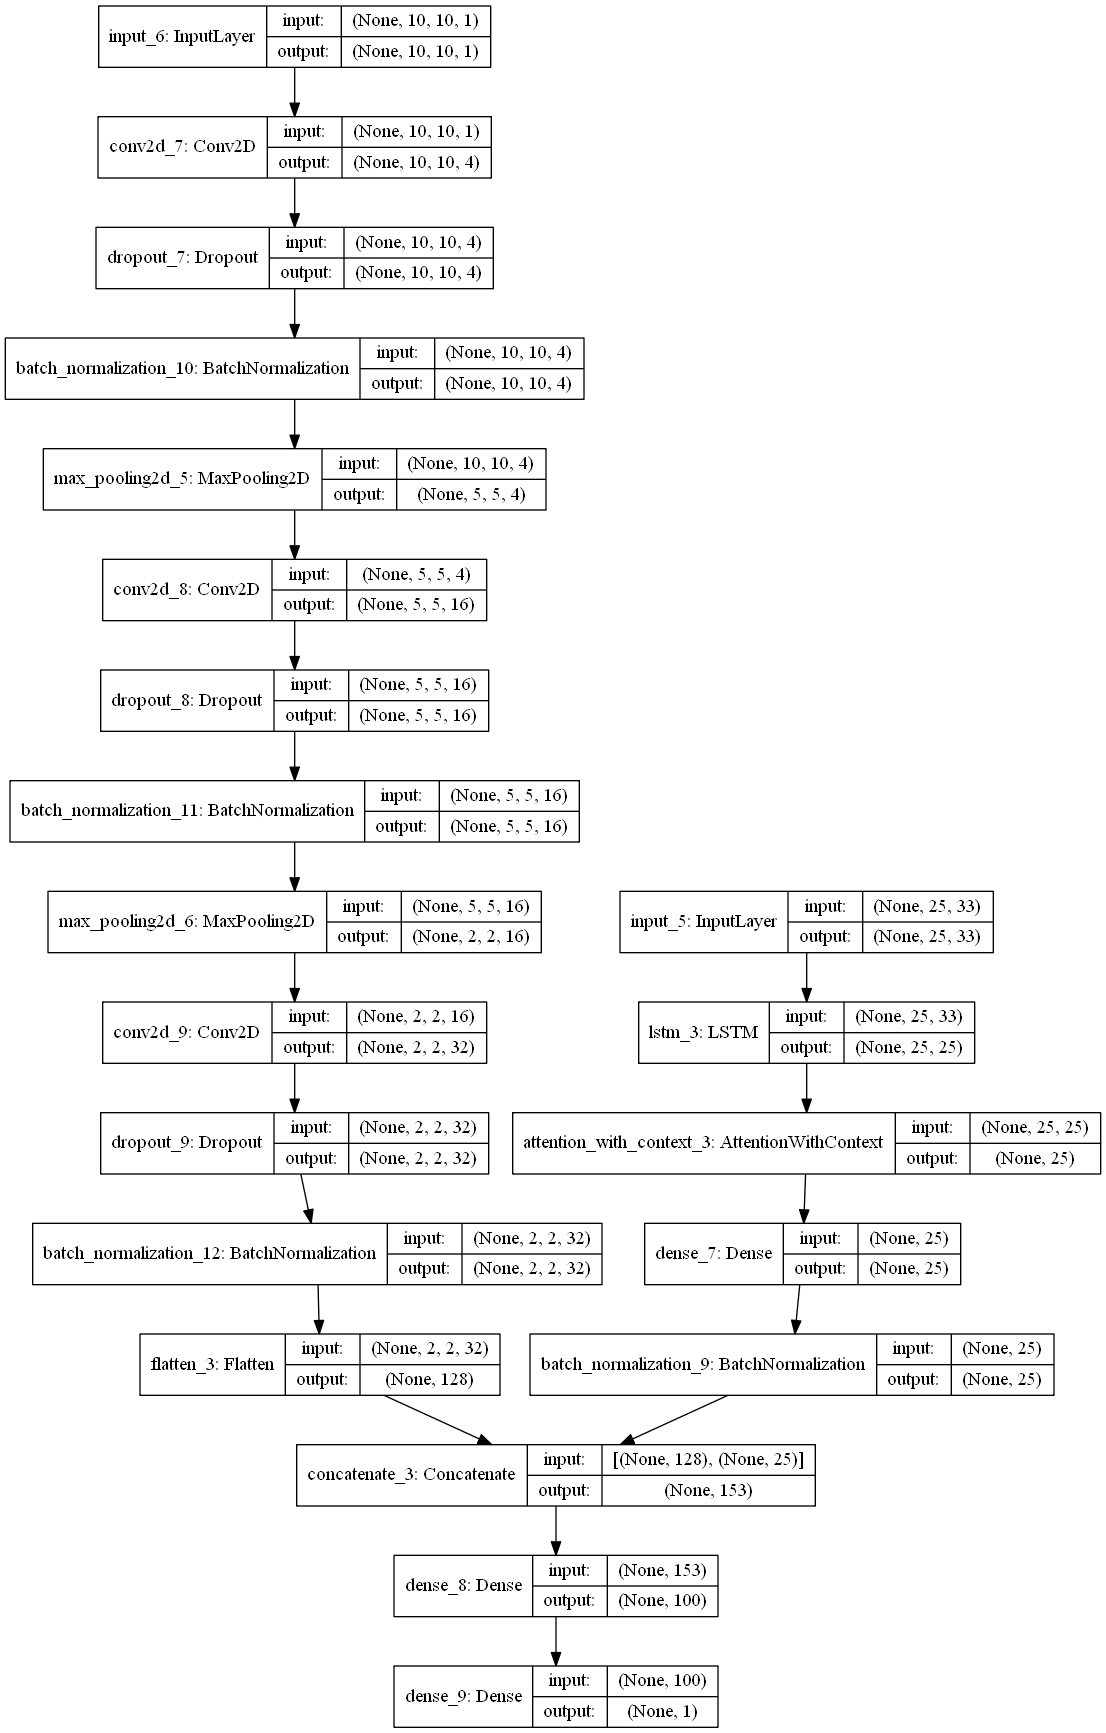

In [53]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [54]:
hist = model.fit([X_images[:-89], X[:-89]], Y[:-89], 
                 validation_data = ([X_images[-89:], X[-89:]], Y[-89:]),
                 epochs=100, callbacks = [tensorboarder], shuffle = False)

Train on 207 samples, validate on 89 samples
Epoch 1/100
207/207 [==============================] - 1s 6ms/step - loss: 1.6653 - mean_absolute_error: 0.9496 - val_loss: 0.4687 - val_mean_absolute_error: 0.5415
Epoch 2/100
207/207 [==============================] - 0s 1ms/step - loss: 1.0149 - mean_absolute_error: 0.8166 - val_loss: 0.7981 - val_mean_absolute_error: 0.7195
Epoch 3/100
207/207 [==============================] - 0s 1ms/step - loss: 1.7101 - mean_absolute_error: 0.8689 - val_loss: 0.8893 - val_mean_absolute_error: 0.7768
Epoch 4/100
207/207 [==============================] - 0s 1ms/step - loss: 1.0637 - mean_absolute_error: 0.6613 - val_loss: 0.4777 - val_mean_absolute_error: 0.5332
Epoch 5/100
207/207 [==============================] - 0s 1ms/step - loss: 0.8727 - mean_absolute_error: 0.6501 - val_loss: 0.3060 - val_mean_absolute_error: 0.4193
Epoch 6/100
207/207 [==============================] - 0s 1ms/step - loss: 0.5899 - mean_absolute_error: 0.5978 - val_loss: 0.2657

207/207 [==============================] - 0s 1ms/step - loss: 0.2199 - mean_absolute_error: 0.3364 - val_loss: 0.1867 - val_mean_absolute_error: 0.3274
Epoch 100/100
207/207 [==============================] - 0s 1ms/step - loss: 0.2308 - mean_absolute_error: 0.3373 - val_loss: 0.1975 - val_mean_absolute_error: 0.3489


In [55]:
# hist = model.fit(X[:-89], Y[:-89], 
#                  validation_data = (X[-89:], Y[-89:]),
#                  #validation_split = 0.3,
#                  epochs=100, callbacks = [tensorboarder], shuffle = False)

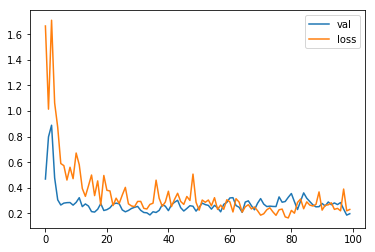

In [56]:
import matplotlib.pyplot as plt
plt.plot(hist.history['val_loss'][0:], label='val')
plt.plot(hist.history['loss'][0:], label='loss')
plt.legend()

In [149]:
# Baseline error (predicting mean)
((Y[-89:] - Y[-89:].mean())**2).mean()

0.6454782828514052

In [58]:
predictions = model.predict([X_images[-89:], X[-89:]])
(((Y[-89:] - predictions.flatten()))**2).mean()

0.1975453458012632

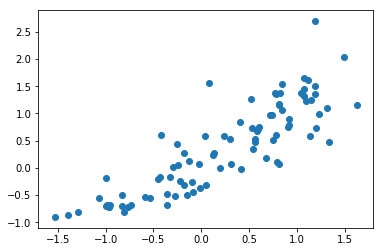

In [59]:
import matplotlib.pyplot as plt
plt.scatter(predictions, Y[-89:])

In [72]:
len(final_dates)

296

In [69]:
Y.shape

(296,)

In [67]:
model.predict([X_images, X]).flatten().shape

(296,)

In [74]:
results = pd.DataFrame({'date':final_dates, 'Y': Y, 'Pred': model.predict([X_images, X]).flatten()})

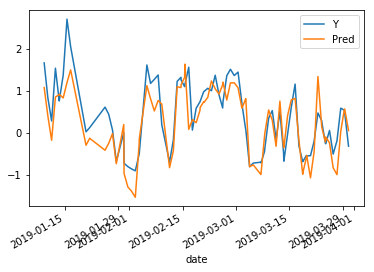

In [78]:
results.iloc[-89:].set_index('date').plot()

In [79]:
results.to_csv('results.csv')

In [61]:
model.save('./models/best_arch')

# Old

 # Train test split, normalization

In [12]:
Y = df['Y']
df.drop(columns= ['date', 'Y'], inplace= True)

In [13]:
train = df.iloc[0:100].copy()
test = df.iloc[8001:].copy()
Y_train = Y.iloc[0:100].copy()
Y_test = Y.iloc[8001:].copy()

In [14]:
train = df.iloc[0:8000].copy()
test = df.iloc[8001:].copy()
Y_train = Y.iloc[0:8000].copy()
Y_test = Y.iloc[8001:].copy()

In [15]:
cs = StandardScaler()
train = cs.fit_transform(train)
test = cs.transform(test)

D:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Fake image data

In [15]:
images_train = np.random.randn(len(train), 10,10,1 )
images_test = np.random.randn(len(test), 10,10,1 )

In [16]:
images_train.shape

(8000, 10, 10, 1)

In [17]:
train.shape

(8000, 33)

# Model

In [18]:
from keras import metrics
from keras.losses import mean_squared_error
from keras.callbacks import TensorBoard
from keras import backend as K
from keras.optimizers import Adam

from keras.layers import Dense, Flatten, Input, Conv2D, Conv2DTranspose, BatchNormalization, Activation, MaxPooling2D, concatenate, Dropout
from keras.models import Model

Using TensorFlow backend.


In [19]:


# Callbacks:
# tensorboard --logdir=D:\imageColorization\logs
tensorboarder = TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')


In [98]:
numeric_input = Input(shape=(train.shape[1],))
image_input = Input(shape=(10,10,1))

# Convolution
def convBlock(x, number_of_filters, kernel_size = (2,2) ):
    x = Conv2D(number_of_filters, kernel_size, strides = 1, padding="same", activation='relu')(x)
    x = Dropout(0)(x) # No dropout for now
    x = BatchNormalization()(x)
    return x

x = convBlock(image_input, 16) 
x = MaxPooling2D(pool_size=(2, 2))(x) 
x = convBlock(x, 16) 
x = MaxPooling2D(pool_size=(2, 2))(x) 

image_output = Flatten()(x) 

merged = concatenate([image_output, numeric_input])

use_images=False

if use_images:
    x = Dense(40, activation="relu")(merged)
else:
    x = Dense(1000, activation="sigmoid")(numeric_input)
    x = BatchNormalization()(x)
    x = Dense(500, activation="relu")(x)
    x = BatchNormalization()(x)
#     x = Dense(500, activation="tanh")(x)
    
#x = Dropout(0.5)(x)
x = Dense(1, activation="linear")(x)

if use_images:
    model = Model(inputs=[image_input, numeric_input], outputs=x)
else:
    model = Model(inputs=numeric_input, outputs=x)

In [99]:
opt = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, decay=0)

model.compile(loss='mean_squared_error',#mean_absolute_error_none,#
              optimizer=opt,
              metrics=['mae'])       
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 33)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 1000)              34000     
_________________________________________________________________
batch_normalization_33 (Batc (None, 1000)              4000      
_________________________________________________________________
dense_27 (Dense)             (None, 500)               500500    
_________________________________________________________________
batch_normalization_34 (Batc (None, 500)               2000      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 501       
Total params: 541,001
Trainable params: 538,001
Non-trainable params: 3,000
_________________________________________________________________


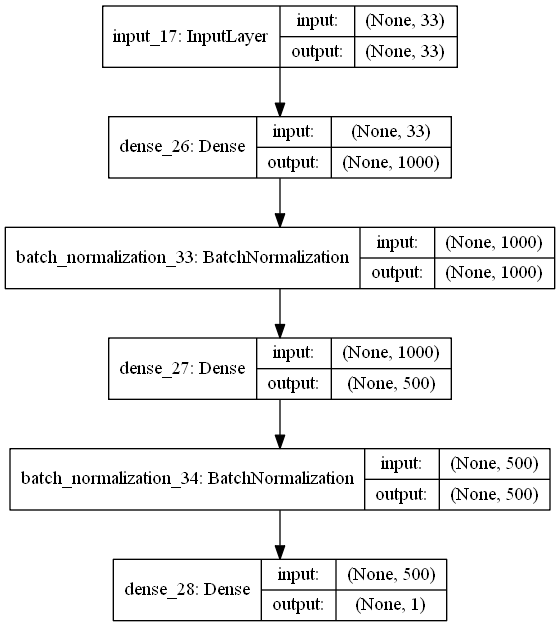

In [100]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [101]:
if use_images:
    hist = model.fit([images_train, train], Y_train.astype(float), 
                     validation_data = ([images_test, test], Y_test.astype(float)),
                     epochs=1000)
else:
    hist = model.fit(train, Y_train.astype(float), 
                     validation_data = (test, Y_test.astype(float)),
                     epochs=20, callbacks = [tensorboarder], shuffle = True)

Train on 8000 samples, validate on 907 samples
Epoch 1/20
8000/8000 [==============================] - 1s 158us/step - loss: 911.0050 - mean_absolute_error: 20.9578 - val_loss: 1316.8699 - val_mean_absolute_error: 28.0213
Epoch 2/20
8000/8000 [==============================] - 1s 112us/step - loss: 854.8994 - mean_absolute_error: 19.7275 - val_loss: 1207.2430 - val_mean_absolute_error: 26.1180
Epoch 3/20
8000/8000 [==============================] - 1s 110us/step - loss: 759.9258 - mean_absolute_error: 18.0208 - val_loss: 1052.4499 - val_mean_absolute_error: 23.6575
Epoch 4/20
8000/8000 [==============================] - 1s 106us/step - loss: 653.2227 - mean_absolute_error: 16.6253 - val_loss: 894.1119 - val_mean_absolute_error: 21.4149
Epoch 5/20
8000/8000 [==============================] - 1s 107us/step - loss: 564.7083 - mean_absolute_error: 15.9641 - val_loss: 764.4358 - val_mean_absolute_error: 19.8688
Epoch 6/20
8000/8000 [==============================] - 1s 107us/step - loss: 50

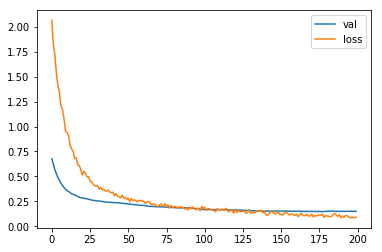

In [142]:
import matplotlib.pyplot as plt
plt.plot(hist.history['val_loss'][0:], label='val')
plt.plot(hist.history['loss'][0:], label='loss')
plt.legend()

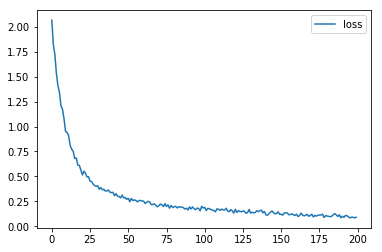

In [143]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'][0:], label='loss')
plt.legend()

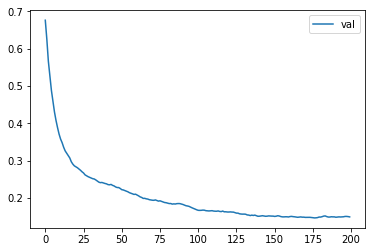

In [144]:
import matplotlib.pyplot as plt
plt.plot(hist.history['val_loss'][:], label='val')
plt.legend()

In [56]:
test[3]

array([0.91035338, 0.40133333, 0.59009009, 0.11637931, 0.90540541,
       0.        , 0.04347826, 0.03846154, 0.36448598, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        ])

In [89]:
predictions = model.predict(test)

In [88]:
predictions = model.predict([images_test, test])

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 2 arrays: [array([[[[-0.34239638],
         [ 0.51991871],
         [-1.56875309],
         ...,
         [-1.81512583],
         [ 1.13432845],
         [ 0.38438009]],

        [[ 1.20838855],
         [-1.37...

In [59]:
((Y_test.mean()-Y_test)**2).pow(1./2).mean()

18.80401726617306

In [60]:
((predictions.squeeze()-Y_test)**2).pow(1./2).mean()

18.42935245223713

In [90]:
predictions

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

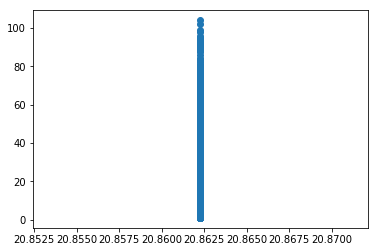

In [72]:
import matplotlib.pyplot as plt
plt.scatter(predictions, Y_test)

(array([45., 34., 23., 25., 16., 29., 29., 25., 16., 23., 19., 15., 17.,
        13., 24., 21., 15., 16., 15., 10., 13.,  9., 16., 12., 11., 16.,
        21., 16.,  4., 15., 12., 13.,  9., 25.,  6., 15., 11., 10.,  8.,
         5., 17.,  8.,  8.,  7.,  5., 11.,  4.,  7.,  7.,  2.,  4.,  2.,
         6.,  6.,  4.,  7.,  6.,  3.,  8.,  7.,  5.,  6.,  5.,  9.,  3.,
         4., 12.,  4.,  2.,  4.,  2.,  3.,  3.,  4.,  2.,  1.,  4.,  1.,
         1.,  0.,  4.,  0.,  1.,  0.,  4.,  1.,  3.,  2.,  1.,  2.,  2.,
         1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.]),
 array([  1.  ,   2.03,   3.06,   4.09,   5.12,   6.15,   7.18,   8.21,
          9.24,  10.27,  11.3 ,  12.33,  13.36,  14.39,  15.42,  16.45,
         17.48,  18.51,  19.54,  20.57,  21.6 ,  22.63,  23.66,  24.69,
         25.72,  26.75,  27.78,  28.81,  29.84,  30.87,  31.9 ,  32.93,
         33.96,  34.99,  36.02,  37.05,  38.08,  39.11,  40.14,  41.17,
         42.2 ,  43.23,  44.26,  45.29,  46.32,  47.35,  48.38,  49.41,
  

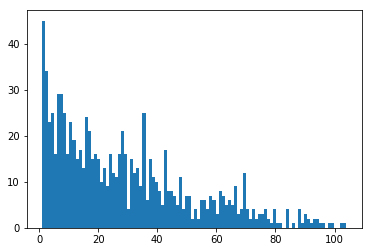

In [42]:
plt.hist(Y_test, bins=100)